<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Tarea semanal 3: Filtro Pasa-bajos </h1></center>

<h3> Teoría de circuitos 2 </h3>
<h3> 2023 </h3>
<h3> Facundo N. Iglesias </h3>

    
</div>

<img src="./rsc/consignas.png"  /> 

In [3]:
#LIbrerias utilizadas
from IPython.display import IFrame, display, Math
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from pytc2.general import Chebyshev_polynomials 
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
import scipy.signal as sig
from sympy.abc import s

<div class="alert alert-info text-left">

<center> <h1> Revisión 2 </h1></center>

<h3> Agregado: Implementación Chebyshev </h3>
    
</div>




Polinomio de Chebyshev

In [33]:
orden = 3
alfa_max = 1 #dB
Chebyshev_polynomials(orden)

w*(4*w**2 - 3)

Polos y ceros:

In [34]:
z,p,k = sig.cheb1ap(orden,alfa_max)
print("Polos:",p, "\n")
print("K =",k)

Polos: [-0.2470853+0.96599867j -0.4941706-0.j         -0.2470853-0.96599867j] 

K = 0.49130668209006784


Función transferencia

In [35]:
num_cheb, den_cheb = sig.zpk2tf(z,p,k)
Ts = sig.TransferFunction(num_cheb, den_cheb)
Ts

TransferFunctionContinuous(
array([0.49130668]),
array([1.        , 0.98834121, 1.23840917, 0.49130668]),
dt: None
)

Análisis de respuesta en frecuencia:

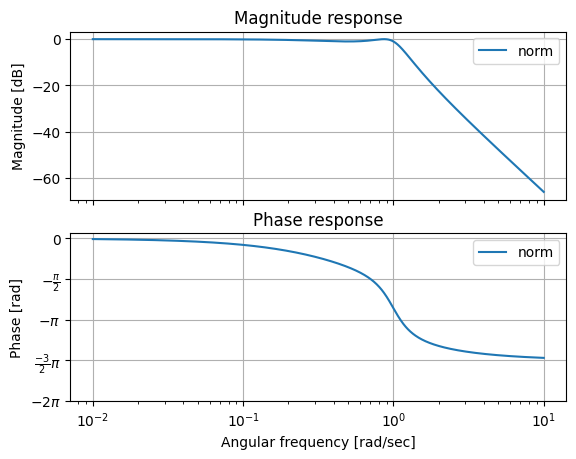

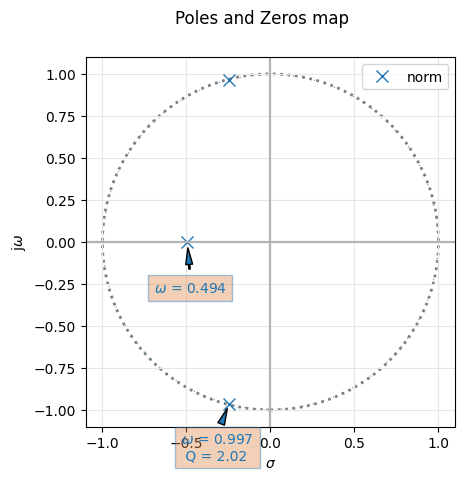

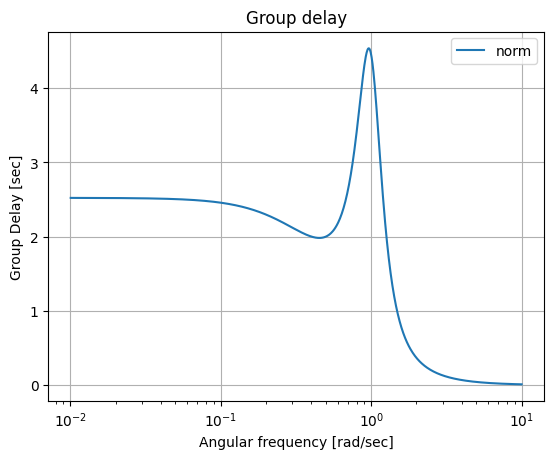

In [36]:
analyze_sys([Ts], ['norm'])

Factorización

In [10]:
#Factorización
filtros = list()
for term in p:
    if np.imag(term) != 0:
        pol = (s - term)*(s - np.conjugate(term))
        filtros.append(sp.expand(pol))
    else:
        filtros.append(s - term)

filtros = filtros[0:int((len(filtros)+1)/2)]
filtros

[s**2 + 0.494170604942381*s + 0.994204586789118, s + 0.49417060494238]

Sintesis y simulación de circuito normalizado

<img src="./rev_2/CircuitoNorm.png" align="right" width="1200" height="600" /> 

So observan los dos picos en el riple de la banda de paso y la atenuación máxima de 1 dB

<div class="alert alert-info text-left">

<center> <h1> Revisión 1 </h1></center>

</div>

Revisión: rev. 1

Correcciones:

- Error algebraico al obtener función transferencia. Mal racionalizado. (error conceptual)
- Bosquejo de respuesta en frecuencia.
- Verificación  con analize_sys
- Implementación de RC para primer orden para evitar inductores (error conceptual).
- Simulaciones corregidas.


### Función transferencia y diagrama de polos y ceros
Uno de los primeros errores que cometí ocurrió al realizar el algebra para llegar a la función transferencia. En el momento no tenía muy en claro los conceptos y no me di cuenta que tenía que llegar a una transferencia con una ganancia de 0 dB en la banda de paso. Por este motivo, se justifica el desarrollo realizado a continuación.

Partiendo de la función transferencia obtenida en la primera entrega se obtiene el diagrama de polos y ceros para efectuar una primera aproximación al análisis de la transferencia:

In [4]:
IFrame("./rev_1/Ftrans-polos_ceros.pdf", width=1000, height=1000)


\begin{equation}
\boxed{T(s) = \frac{2}{(s+1,26)(s²+1,26s+1,59)}}
\end{equation}

\begin{equation}
T(0) = \frac{2}{1,26*1,59} = 1 \rightarrow T(0)|_{dB} = 0 dB
\end{equation}

Vemos que cumple con la ganancia correspondiente de 0 dB en la banda de paso. 

Como el polinomio denominador es de grado 3, procedemos a separar la función transferencia en una bilineal y una bicuadrática para identificar parámetros caracteristicos de cada una:

\begin{equation}
T(s) = \frac{1,26}{(s+1,26)} \frac{1,59}{(s²+1,26s+1,59)}
\end{equation}

De la bilineal vemos que es un pasa-bajos de primer orden con ganancia de 0dB en la banda de paso y frecuencia de corte igual a:
\begin{equation}
\omega_0 = 1,26
\end{equation}

De la bicuadrática vemos que es un pasa-bajos de segundo orden con ganancia de 0dB en la banda de paso y la siguiente frecuencia de corte y factor de calidad respectivamente:
\begin{equation}
\omega_0 = \sqrt{1,59}
\end{equation}
\begin{equation}
Q = \frac{\omega_0}{1,26} = \frac{\sqrt{1,59}}{1,26} = 1
\end{equation}

También podemos calcular el Q a partir del diagrama de polos y ceros:
\begin{equation}
Q = \frac{1}{2cos(\frac{\pi)}{3}} = 1
\end{equation}

Para verificar lo obtenido graficamos ambas transferencias:


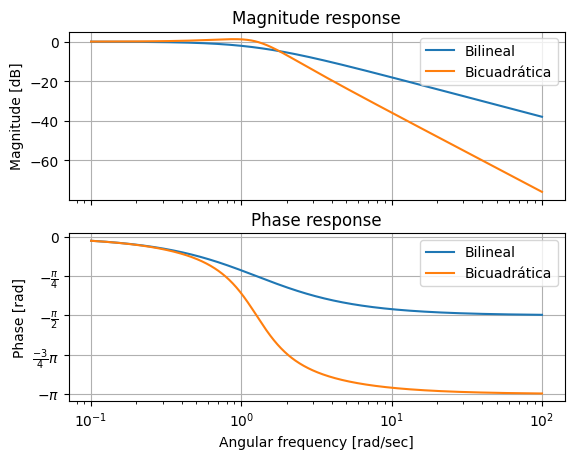

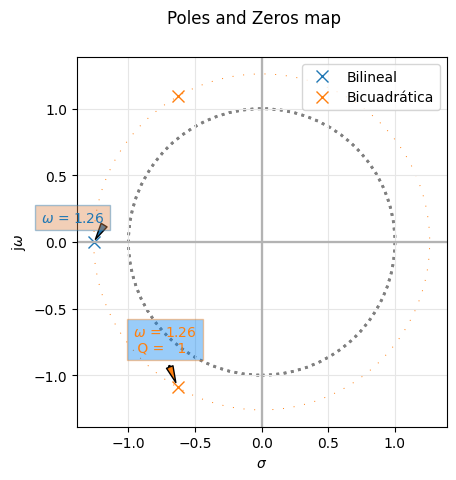

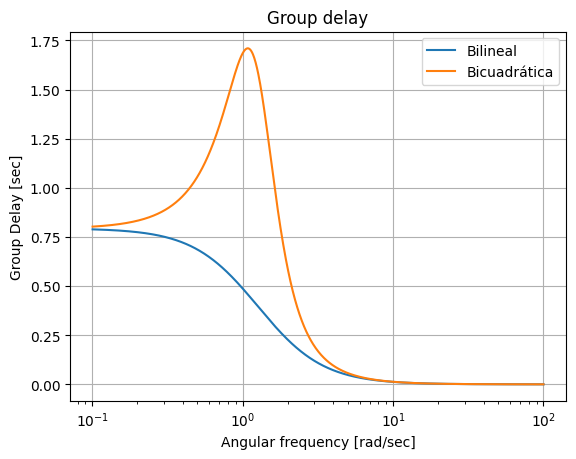

In [8]:
analyze_sys([sig.TransferFunction([1.26],[1,1.26])], ['Bilineal'])
analyze_sys([sig.TransferFunction([1.59],[1,1.26,1.59])], ['Bicuadrática'])

Vemos que ambas transferencias de sendos pasa-bajos se encuentran centradas en la misma frecuencia.

Con respecto al retardo de grupo vemos que el correspondiente a la bilineal resulta más plano que el de la bicuadrática, debido a los polos complejos conjugados que provocan una pendiente mayor en la fase de la bicuadrática.

En el próximo apartado se procederá a realizar el análisis de módulo y fase.

Nota: El pequeño realce en el gráfico de modulo se debe a la aproximación de los coeficientes de la transferencia.


### Bosquejo de respuesta en frecuencia

Con el diagrama de polos y ceros obtenido podemos efectuar las siguientes aseveraciones y en base a ello realizar un bosquejo de la respuesta en frecuencia:

In [5]:
IFrame("./rev_1/bosquejo_rf.pdf", width=1000, height=1000)

### Simulación de la función transferencia completa utilizando  analyse_sys 

A continuación se simulará la transferencia completa y la normalización empleando la omega de Butterworth

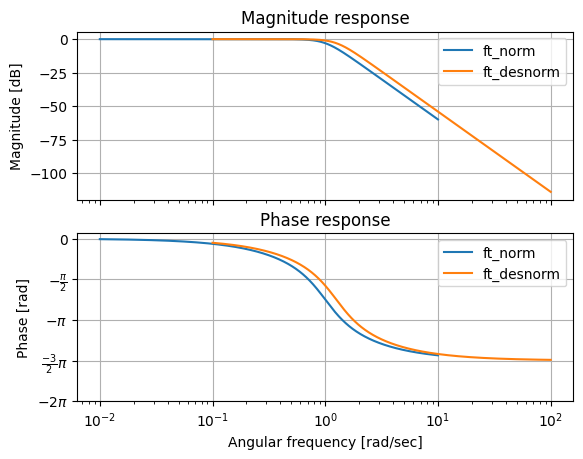

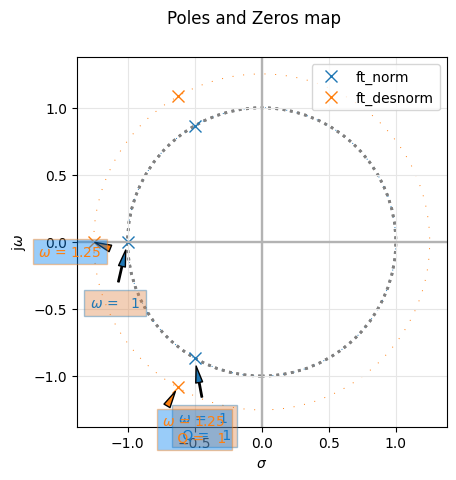

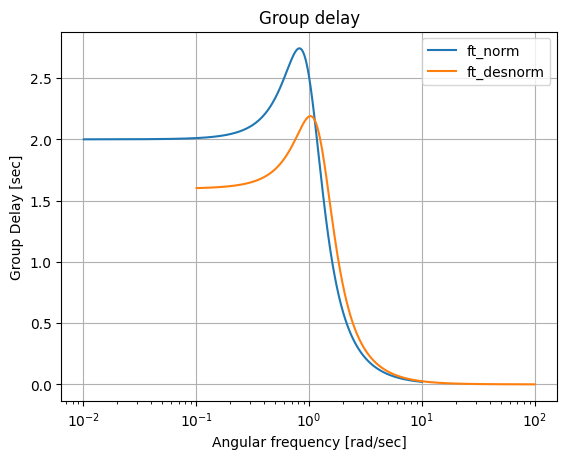

In [10]:
from pytc2.sistemas_lineales import analyze_sys
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

z,p,k = sig.buttap(3)
num_lp, den_lp = sig.zpk2tf(z,p,k)
eps = np.sqrt(10**(1/10)-1)

num_lp_d, den_lp_d = sig.lp2lp(num_lp,den_lp, eps**(-1/3) )

plt.close('all')

#%matplotlib qt5
analyze_sys([sig.TransferFunction(num_lp, den_lp)], ['ft_norm'])
analyze_sys([sig.TransferFunction(num_lp_d,den_lp_d)], ['ft_desnorm'])

En el primer gráfico se puede ver que las transferencias de módulo son iguales salvo por el pequeño corrimiento en frecuencia debido a que la transferencia de Butterworth está normalizada para w0 = 1. Lo mismo se puede notar en el diagrama de polos y ceros en el que la circunferencia sobre las que están situadas las singularidades de la transferencia contiene a la circunferencia sobre la que se sitúan las singularidades de la transferencia de Butterworth.

Cabe destacar que, aunque no se ven en el gráfico, ambas transferencias presentan ceros en el infinito.

### Sintesis de circuitos
A continuación se sintetizan las transferencias que componen el filtro separando los bloques con un buffer para no cargar la salida. Luego se realiza una desnormalización en frecuencia teniendo en cuenta que solo se dispone de capacitores con un valor de 100nF.

In [6]:
IFrame("./rev_1/sintesis-norm_desnorm.pdf", width=1000, height=1000)

### Simulación del circuito normalizado:

<img src="./rev_1/sim/circuitoNormalizado.png" align="right" width="1200" height="600" /> 

Se observa en la simulación que el circuito normalizado cumple con la plantilla:
\begin{equation}
f_p = 162,93 mHz \rightarrow w_p = 1,023 \frac{rad}{s}
\end{equation}

\begin{equation}
|T(w_p= 1,023| = -1,082 dB 
\end{equation}

\begin{equation}
f_s = 314,185 mHz \rightarrow w_s = 1,974 \frac{rad}{s}
\end{equation}

\begin{equation}
|T(w_s= 1,023| = -12 dB 
\end{equation}

Rotación de fase de 270° como se determinó en el bosquejo de respuesta en frecuencia.


### Simulación del circuito desnormalizado (C=100nF)

<img src="./rev_1/sim/circuitoC100nF.png" align="right" width="1200" height="600" /> 

Se observa en la simulación que el circuito desnormalizado cumple con la plantilla:

\begin{equation}
|T||_{f_p= 1521Hz} = -1,039 dB 
\end{equation}

\begin{equation}
|T||_{f_s= 3024Hz} = -12,485 dB 
\end{equation}

Rotación de fase de 270° como se determinó en el bosquejo de respuesta en frecuencia.


### Circuito implementado con FNDR
Para evitar el uso de inductores en el circuito, se aplica la transformación de Bruton para luego activarlos utilizando el GIC de Antoniou configurado de forma tal que nos permita simular el comportamiento eléctrico de un inductor en serie.

In [11]:
IFrame("./rev_1/circuitoFDNR.pdf", width=1000, height=1000)

### Simulación de circuito normalizado implementado con FDNR

<img src="./rev_1/sim/simulacionFDNR.png" align="right" width="1200" height="600" /> 

Vemos como el circuito continúa comportandose como se anticipó en el análisis, cumpliendo con la plantilla de diseño del filtro!

------------------------------------------------------------------------------------------------------------------

<div class="alert alert-info text-left">

<center> <h1> Primera entrega </h1></center>

</div>

## 1) Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función



In [27]:
IFrame("./rsc/ej1.pdf", width=1000, height=1000)

### Verificación con Sympy

In [3]:
a,b,d,e = sp.symbols("a,b,d,e")
num  = e*e
dens =(s+a)*(s**2+b*s+d)
den_s =(-s+a)*(s**2-b*s+d)
print("Expresión:") 
num/(dens*den_s)

Expresión:


e**2/((a - s)*(a + s)*(-b*s + d + s**2)*(b*s + d + s**2))

In [4]:
print("Denominador desarrollado")
den_exp = sp.simplify(sp.expand(den_s*dens))
den_exp

Denominador desarrollado


-a**2*b**2*s**2 + a**2*d**2 + 2*a**2*d*s**2 + a**2*s**4 + b**2*s**4 - d**2*s**2 - 2*d*s**4 - s**6

In [5]:
#Agrupar terminos
s0 = sp.collect(den_exp,s,evaluate=False)[1]
s2 = sp.collect(den_exp,s,evaluate=False)[s**2]
s4 = sp.collect(den_exp,s,evaluate=False)[s**4]

#Resolver sistema de ecuaciones
sistema = sp.solve([ 
            num-4,
            s0-4,
            s2,
            s4
            ], 
            [a,b,d,e])

#Iteración para probar entre posibles soluciones
soluciones = list()
for solucion in sistema:
    solucion= str(solucion)
    if("I" not in solucion):
        #No es complejo
        solucion = solucion.replace("sqrt(2)","1.4142")
        solucion = parse_expr(solucion)
        solucion = str(solucion)
        if("I" not in solucion):
            #Coeficiente no es negativo (FRP)
            if("-" not in solucion):
                soluciones.append(parse_expr(solucion))

print("Soluciones: [a,b,d,e]")
soluciones

Soluciones: [a,b,d,e]


[(2**(1/3), 2**(1/3), 2**(2/3), 2)]

### 2) Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

In [21]:
IFrame("./rsc/ej2.pdf", width=1000, height=1000)

### Simulación con matplotlib

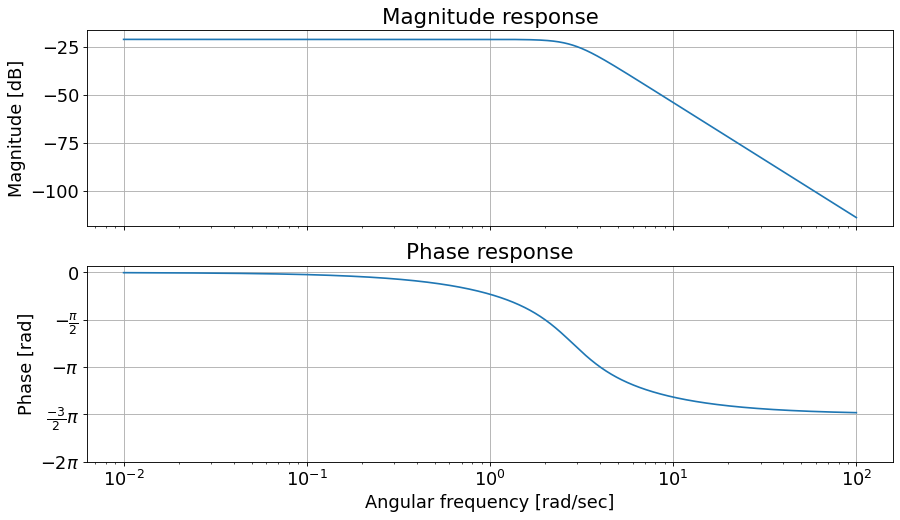

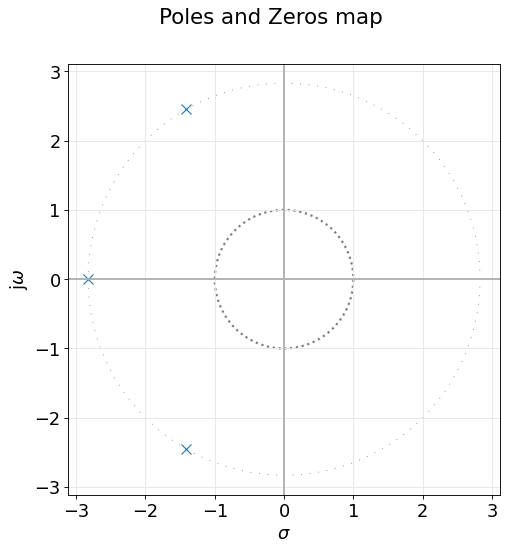

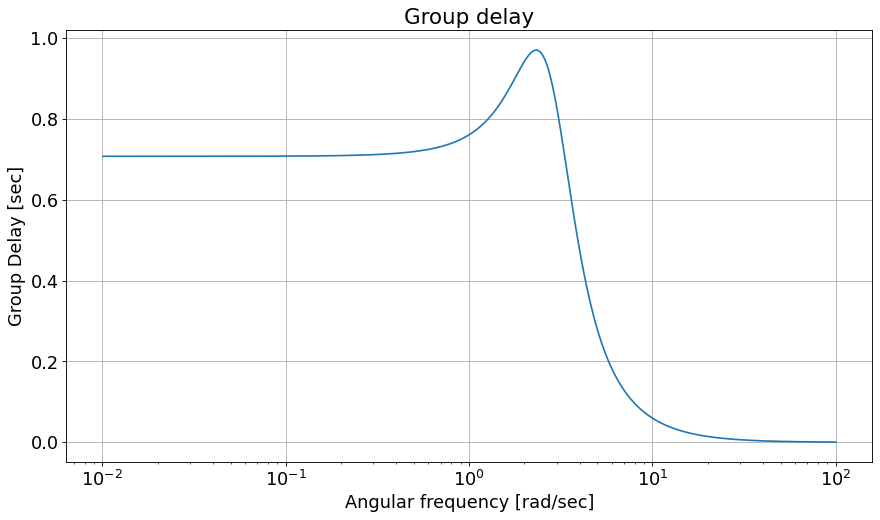

In [13]:
plotearFtransCoef( [2] , [ 1 , 2*sqrt(8) , 16 , 8*sqrt(8) ])

### 3) Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.
\begin{equation}
T(s)= \frac{2}{8\sqrt{8}} \frac{\sqrt{8}}{s+\sqrt{8}} \frac{\frac{8}{s}}{(s+\sqrt{8})+\frac{8}{s}}
\end{equation}

<img src="./rsc/sim/circuito_implementado.png" align="right" width="1200" height="600" /> 

### 4) Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

In [27]:
IFrame("./rsc/ej4.pdf", width=1000, height=1000)

### 5) Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

In [28]:
IFrame("./rsc/ej5.pdf", width=1000, height=1000)

### 6) Proponer un planteo alternativo a 1) usando la ωButter (ver Schaumann 6.4)

In [3]:
IFrame("./rsc/ej6.pdf", width=1000, height=1000)

### Tabla de Butterworth 
fuente: Capítulo 6 Shaumann
<img src="./rsc/tablaButter.png" align="right" width="1200" height="600" /> 

### Simulación de circuito Butterworth en LtSpice
#Desnormalización
\begin{equation}
T(s)=  \frac{11,874}{s+11,874} \frac{\frac{11,874}{s}}{(\frac{s}{11,874}+1) + \frac{11,874}{s}}
\end{equation}

<img src="./rsc/sim/6_circuitoBW.png" align="right" width="1200" height="600" /> 


En la simulación se observa la atenuación de 1 dB (alfa max) a 1,5 kHz y la atenuación de 12 dB a 3 kHz (alfa min), cumpliendo con la plantilla.

---------------------------------------------------------------------------------------------------------

### Funciones auxiliares

In [6]:
#Función para graficar Modulo, Fase, Diagrama de polos y ceros y Retardo de grupo de una función transferencia de orden 6 o menor.
#Recibe los parámetros:
    #p: Lista de coeficientes del numerador.
    #q: Lista de coeficientes del denominador.
    
def plotearFtransCoef(p,q):
    from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
    from scipy.signal import TransferFunction
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    
    plt.figure(1)
    plt.close(1)

    fig_sz_x = 13
    fig_sz_y = 7
    fig_dpi = 80 # dpi
    fig_font_size = 16

    mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
    mpl.rcParams['figure.dpi'] = fig_dpi
    plt.rcParams.update({'font.size':fig_font_size})
    
    my_tf = TransferFunction(p,q)

    bodePlot(my_tf, fig_id=1)

    pzmap(my_tf, fig_id=2)

    GroupDelay(my_tf, fig_id=3)

In [60]:
#Función para graficar Modulo, Fase, Diagrama de polos y ceros y Retardo de grupo de una función transferencia de segundo orden.
#Recibe los parámetros:
    #w0: Frecuencia de corte del filtro.
    #Q: Factor de calidad del filtro.
    #K: Ganancia en VECES CON SIGNO DE FASE
    #tipo: String para el tipo de filtro ("lp","hp","bp","ap","n")
    #wn: Frecuencia suprimida (solo para filtro Notch)

def plotearFtrans(w0,Q,K,tipo, wn):
    from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
    from scipy.signal import TransferFunction
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    
    plt.figure(1)
    plt.close(1)

    fig_sz_x = 13
    fig_sz_y = 7
    fig_dpi = 80 # dpi
    fig_font_size = 16

    mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
    mpl.rcParams['figure.dpi'] = fig_dpi
    plt.rcParams.update({'font.size':fig_font_size})
    
    p0 = 0 
    p1 = 0
    p2 = 0
    if(tipo == "lp"):
        p0 = K*w0*w0
    elif(tipo == "bp"):
        p1 = K*w0/Q
    elif(tipo == "hp"):
        p2 = K
    elif(tipo == "n"):
        p2 = K
        p0 = K*wn*wn
    elif(tipo == "ap"):
        p0 = K*w0*w0
        p1 = -K*w0/Q
        p2 = K
    
    my_tf = TransferFunction( [p2,p1,p0], [1,w0/Q,w0*w0] )

    bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f}'.format(w0) )

    pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f}'.format(w0)) #S plane pole/zero plot

    GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f}'.format(w0))
    

---------------------------------------------------------------------------------------------------

### Prueba 1 n=4 (2 terminos de n=2)

In [195]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

In [196]:
a,b,c,d,f = sp.symbols("a,b,c,d,f")

num  = f
dens = (s**2+a*s+b)*(s**2+c*s+d)
den_s = (s**2-a*s+b)*(s**2-c*s+d)

print("Expresión:") 
num/(dens*den_s)

Expresión:


f/((-a*s + b + s**2)*(a*s + b + s**2)*(-c*s + d + s**2)*(c*s + d + s**2))

In [197]:
print("Denominador desarrollado")
den_exp = sp.simplify(sp.expand(den_s*dens))
den_exp

Denominador desarrollado


a**2*c**2*s**4 - a**2*d**2*s**2 - 2*a**2*d*s**4 - a**2*s**6 - b**2*c**2*s**2 + b**2*d**2 + 2*b**2*d*s**2 + b**2*s**4 - 2*b*c**2*s**4 + 2*b*d**2*s**2 + 4*b*d*s**4 + 2*b*s**6 - c**2*s**6 + d**2*s**4 + 2*d*s**6 + s**8

In [198]:
#Agrupar terminos
s0 = sp.collect(den_exp,s,evaluate=False)[1]
s2 = sp.collect(den_exp,s,evaluate=False)[s**2]
s4 = sp.collect(den_exp,s,evaluate=False)[s**4]
s6 = sp.collect(den_exp,s,evaluate=False)[s**6]

#Resolver sistema de ecuaciones
sistema = sp.solve([ 
            num-4,
            s0-4,
            s2,
            s4,
            s6,
            ], 
            [a,b,c,d])

#Presentar solucion
for solucion in sistema:
    solucion= str(solucion)
    if("I" not in solucion):
        #No es complejo
        solucion = solucion.replace("sqrt(2)","1.4142")
        solucion = parse_expr(solucion)
        solucion = str(solucion)
        if("I" not in solucion):
            #Coeficiente no es negativo (FRP)
            if("-" not in solucion):
                print(parse_expr(solucion))

(0.910164820238620, 1.41420000000000, 2.19736205482847, 1.41420000000000)
(2.19736205482847, 1.41420000000000, 0.910164820238620, 1.41420000000000)


Gráfica


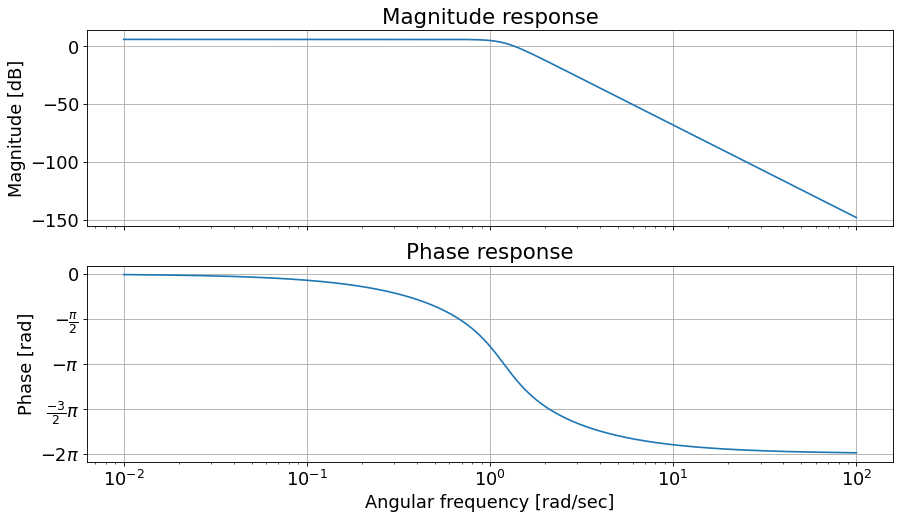

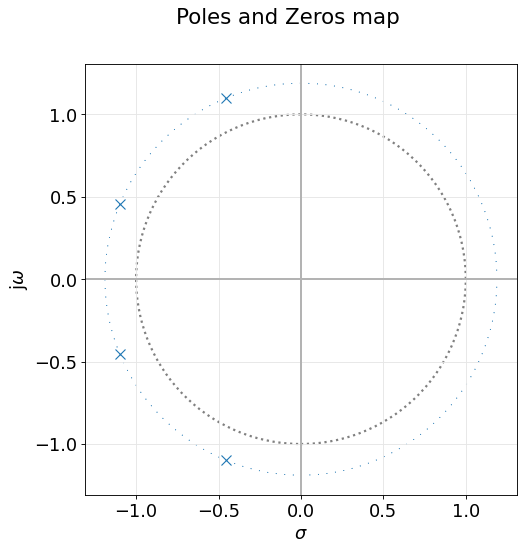

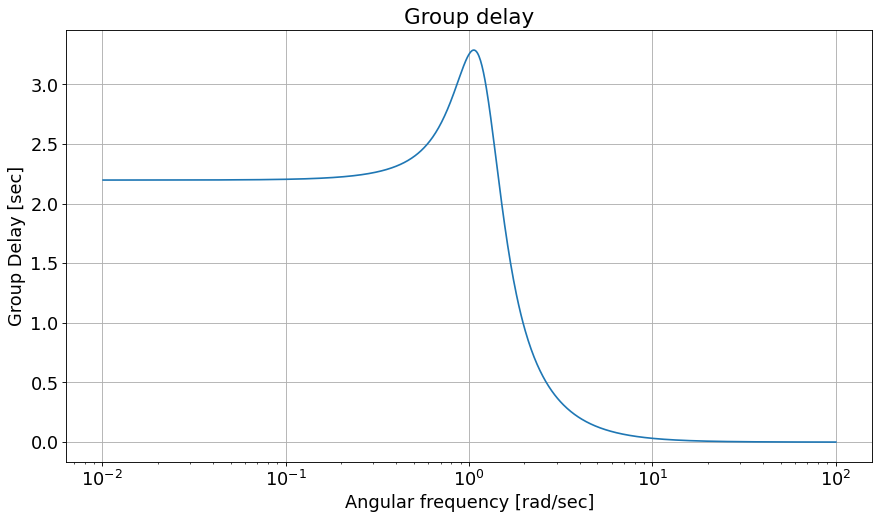

In [202]:
print("Gráfica")
solucion = list(soluciones[1])
solucion.insert(0,1)
solucion = [float(x) for x in solucion]
plotearFtransCoef([4],solucion)

### Prueba 2 n=4 (1 termino de n=4)

In [203]:
a,b,c,d = sp.symbols("a,b,c,d")

num  = b*d
dens = s**4+a*s**3+b*s**2+c*s+d
den_s = s**4-a*s**3+b*s**2-c*s+d

print("Expresión:") 
num/(dens*den_s)

Expresión:


b*d/((-a*s**3 + b*s**2 - c*s + d + s**4)*(a*s**3 + b*s**2 + c*s + d + s**4))

In [204]:
print("Denominador desarrollado")
den_exp = sp.simplify(sp.expand(den_s*dens))
den_exp

Denominador desarrollado


-a**2*s**6 - 2*a*c*s**4 + b**2*s**4 + 2*b*d*s**2 + 2*b*s**6 - c**2*s**2 + d**2 + 2*d*s**4 + s**8

In [205]:
#Agrupar terminos
s0 = sp.collect(den_exp,s,evaluate=False)[1]
s2 = sp.collect(den_exp,s,evaluate=False)[s**2]
s4 = sp.collect(den_exp,s,evaluate=False)[s**4]
s6 = sp.collect(den_exp,s,evaluate=False)[s**6]

#Resolver sistema de ecuaciones
sistema = sp.solve([ 
            s0-4,
            s2,
            s4,
            s6,
            ], 
            [a,b,c,d])

#Iteración para probar entre posibles soluciones+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
soluciones = list()
for solucion in sistema:
    solucion= str(solucion)
    if("I" not in solucion):
        #No es complejo
        solucion = solucion.replace("sqrt(2)","1.4142")
        solucion = parse_expr(solucion)
        solucion = str(solucion)
        if("I" not in solucion):
            #Coeficiente no es negativo (FRP)
            if("-" not in solucion):
                soluciones.append(parse_expr(solucion))
print("Soluciones:")
soluciones

Soluciones:


[(1.28716743277633, 0.828400000000000, 1.82032964047724, 2),
 (3.10753921938244, 4.82840000000000, 4.39472410965694, 2)]

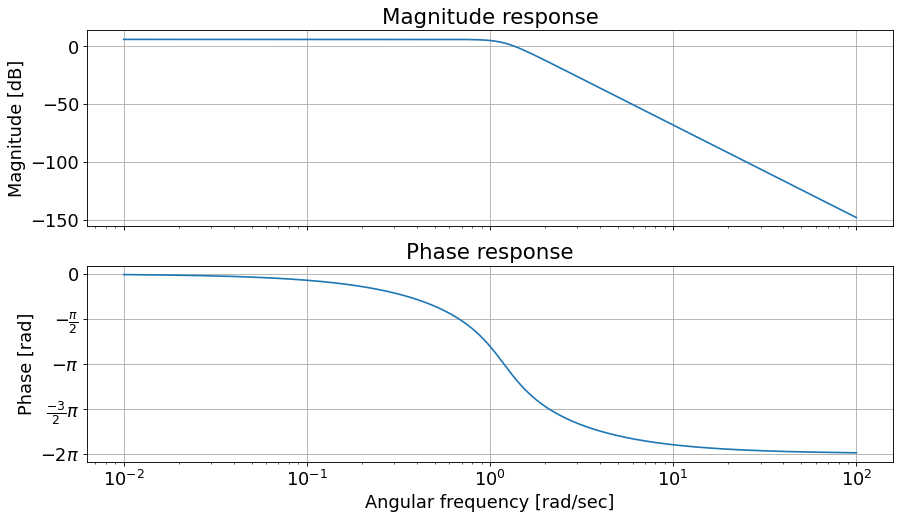

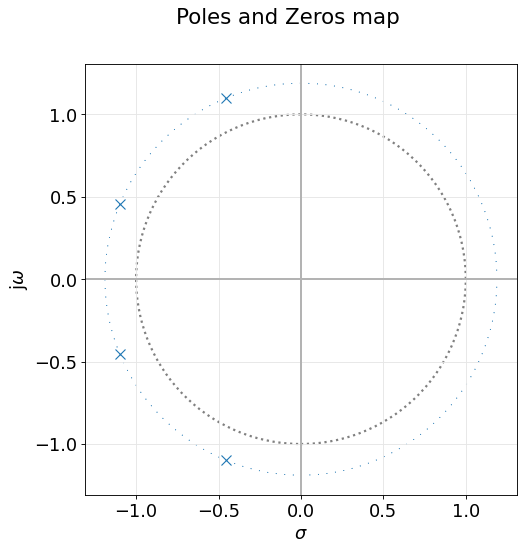

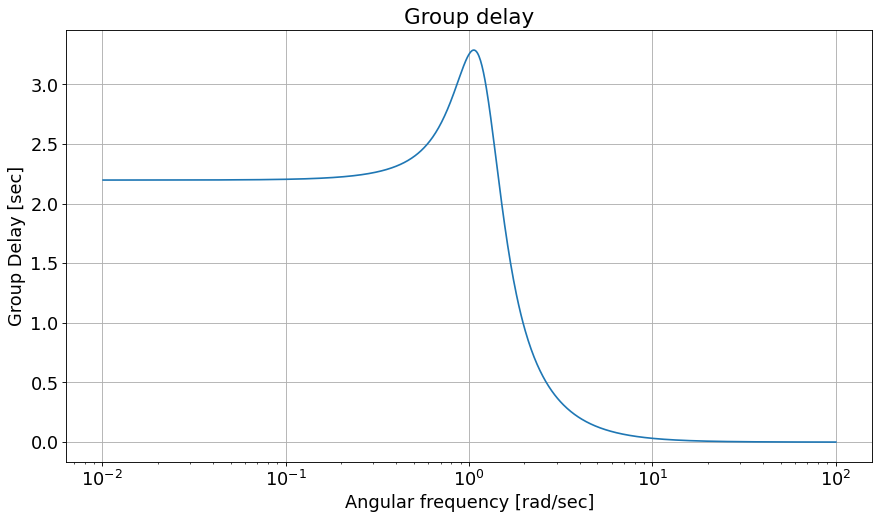

In [206]:
solucion = list(soluciones[1])
solucion.insert(0,1)
solucion = [float(x) for x in solucion]
plotearFtransCoef([4],solucion)